<a href="https://colab.research.google.com/github/duanefonseca/CricketML/blob/main/curva_de_captura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados retirados da publicação da FAO, p.135, coluna 'average'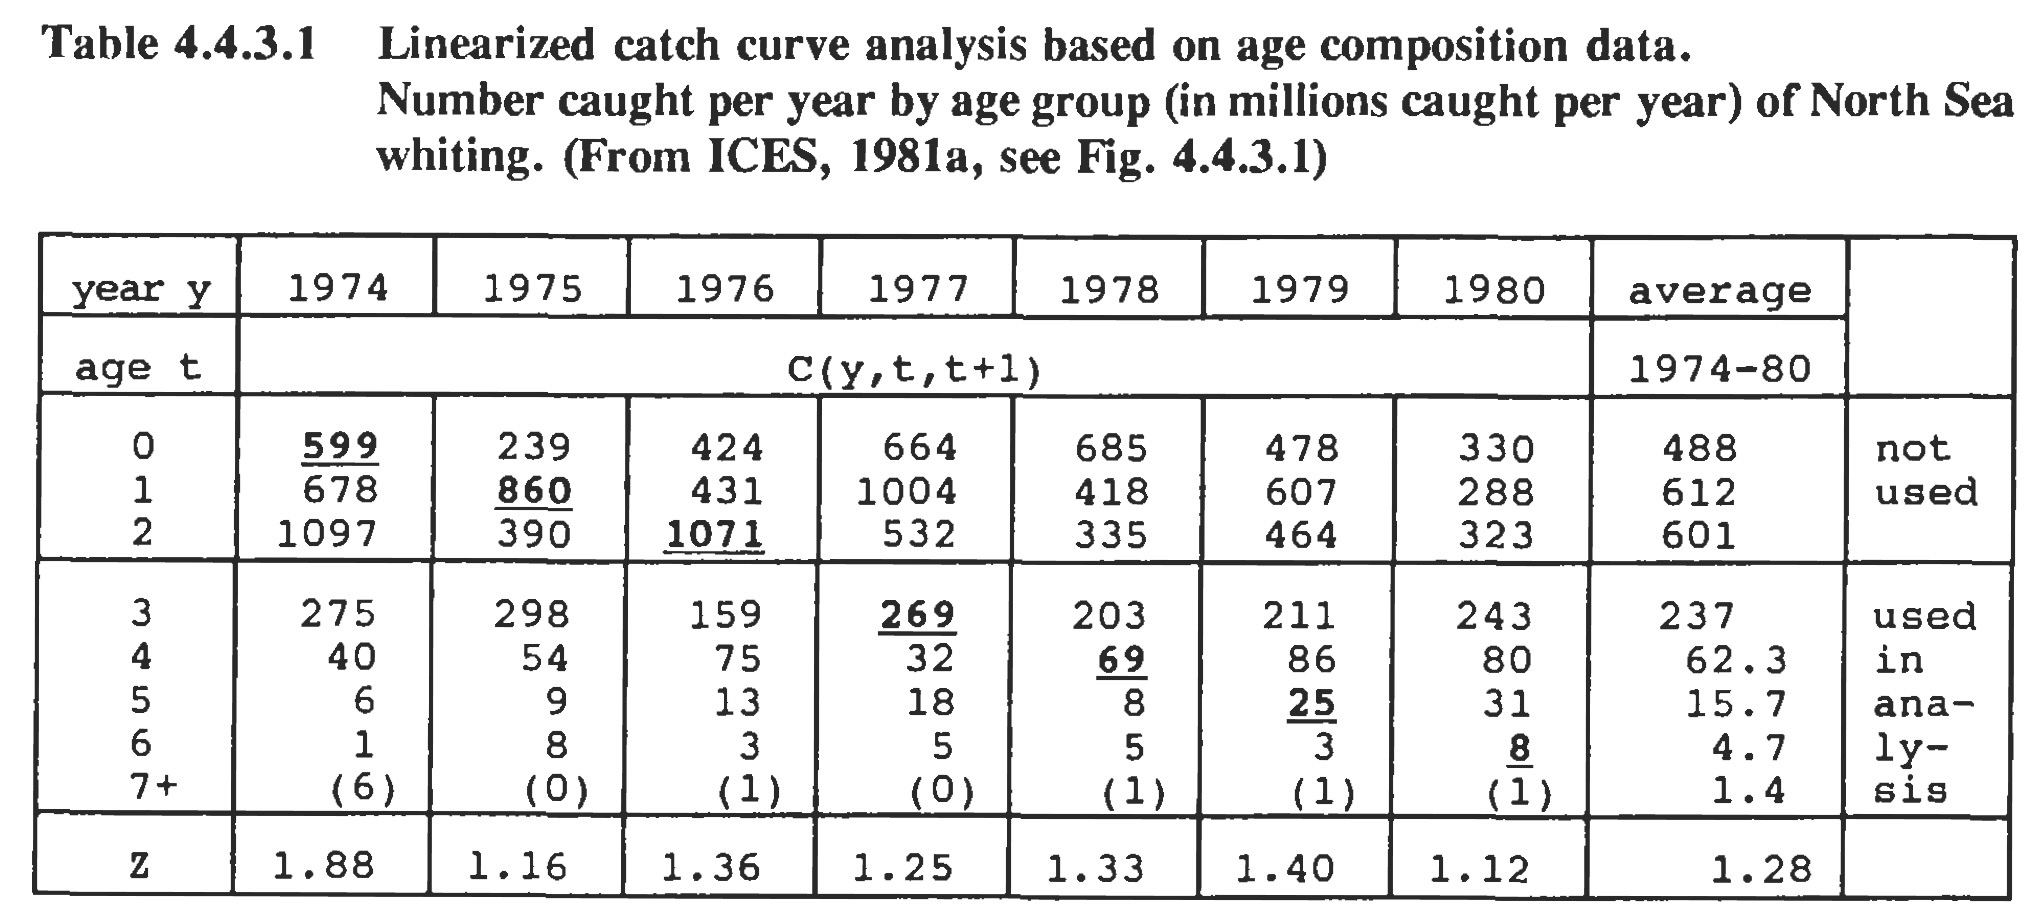
https://openknowledge.fao.org/server/api/core/bitstreams/bc7c37b6-30df-49c0-b5b4-8367a872c97e/content

# Carregue o código abaixo. Para utilizar com os seus dados, quando solicitado, faça o upload de um arquivo csv com os dados de idade na coluna A e dados que número de indivíduos na columa B

Saving catch_curve.csv to catch_curve.csv


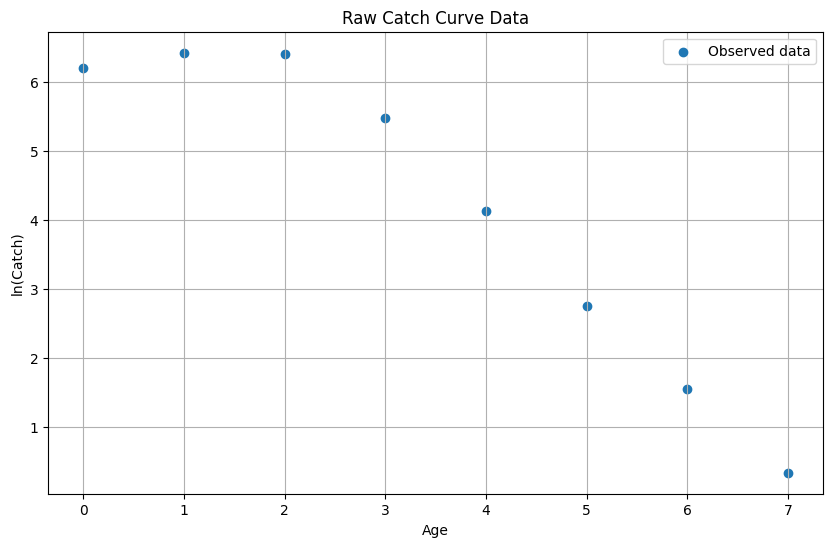

Raw data has been plotted. You can now proceed with the analysis.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

def load_data(filename):
    """
    Load data from a CSV file.

    Parameters:
    filename (str): Name of the CSV file

    Returns:
    tuple: (ages, catches)
    """
    df = pd.read_csv(filename)
    ages = df.iloc[:, 0].values
    catches = df.iloc[:, 1].values
    return ages, catches

def plot_raw_data(ages, catches):
    """
    Plot the raw data as a scatter plot.

    Parameters:
    ages (array-like): Age classes
    catches (array-like): Number of individuals caught in each age class
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(ages, np.log(catches), label='Observed data')
    plt.xlabel('Age')
    plt.ylabel('ln(Catch)')
    plt.title('Raw Catch Curve Data')
    plt.legend()
    plt.grid(True)
    plt.show()


# Upload CSV file
uploaded = files.upload()
filename = next(iter(uploaded))

# Read CSV file
df = pd.read_csv(filename)

# Load the data
ages, catches = load_data(filename)

# Plot the raw data
plot_raw_data(ages, catches)

print("Raw data has been plotted. You can now proceed with the analysis.")

## Baseado no gráfico acima, rode o código abaixo e selecione os pontos que serão utilizados na regressão (x mínimo e x máximo). Uma regra prática é incluir apenas os pontos de dados à direita do ponto mais alto (em termos de ln(Nt)) no cálculo de regressão.

In [14]:
import numpy as np
from scipy import stats

def catch_curve_analysis(ages, catches, x_min=None, x_max=None):
    """
    Perform catch curve analysis.

    Parameters:
    ages (array-like): Age classes
    catches (array-like): Number of individuals caught in each age class
    x_min (float): Minimum age for regression (default: None)
    x_max (float): Maximum age for regression (default: None)

    Returns:
    tuple: (slope, intercept, r_value, p_value, std_err, conf_int)
    """
    # Filter data based on x_min and x_max
    mask = (ages >= x_min) & (ages <= x_max)
    filtered_ages = ages[mask]
    filtered_catches = catches[mask]

    # Calculate ln(catch)
    ln_catches = np.log(filtered_catches)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_ages, ln_catches)

    # Calculate 95% confidence interval for the slope
    n = len(filtered_ages)
    dof = n - 2  # degrees of freedom
    t_value = stats.t.ppf(0.975, dof)  # t-value for 95% CI
    ci = t_value * std_err
    conf_int = (slope - ci, slope + ci)

    return slope, intercept, r_value, p_value, std_err, conf_int

# Ask user for the minimum and maximum age of regression
x_min = float(input("Enter minimum age for regression: "))
x_max = float(input("Enter maximum age for regression: "))

# Perform analysis
slope, intercept, r_value, p_value, std_err, conf_int = catch_curve_analysis(ages, catches, x_min, x_max)

# Print results
print(f"Slope (mortality rate, Z): {-slope:.4f}")
print(f"95% Confidence Interval for slope: ({-conf_int[1]:.4f}, {-conf_int[0]:.4f})")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

Enter minimum age for regression: 3
Enter maximum age for regression: 7
Slope (mortality rate, Z): 1.2848
95% Confidence Interval for slope: (1.2134, 1.3561)
R-squared: 0.9991
P-value: 0.0000


## Plote o gráfico rodando o código abaixo.
Cores podem ser modificadas em
'Ask user for color preferences'

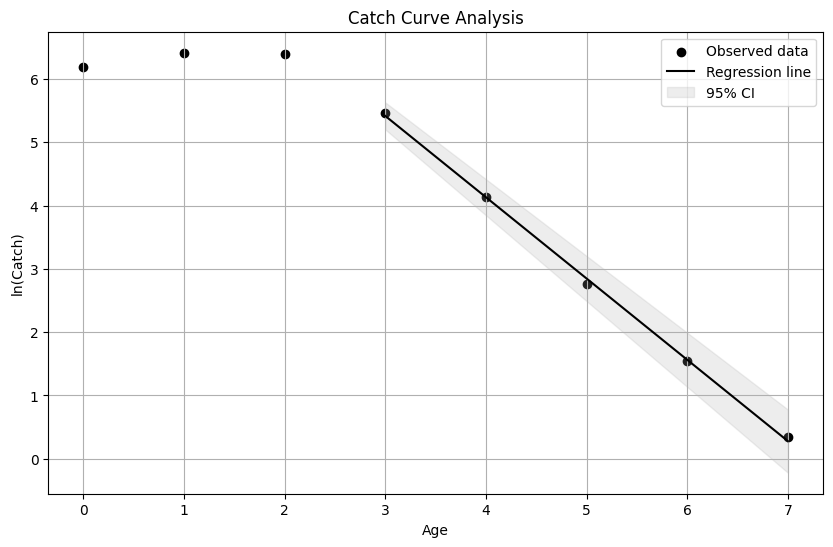

In [15]:
import matplotlib.pyplot as plt

def plot_catch_curve(ages, catches, slope, intercept, conf_int, x_min, x_max,
                     scatter_color='b', regression_color='r', ci_color='r'):
    """
    Plot the catch curve and regression line with confidence interval.

    Parameters:
    ages (array-like): Age classes
    catches (array-like): Number of individuals caught in each age class
    slope (float): Slope of the regression line
    intercept (float): Intercept of the regression line
    conf_int (tuple): 95% confidence interval for the slope
    x_min (float): Minimum age for regression
    x_max (float): Maximum age for regression
    scatter_color (str): Color for scatter plot points
    regression_color (str): Color for regression line
    ci_color (str): Color for confidence interval
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(ages, np.log(catches), color=scatter_color, label='Observed data')

    # Plot regression line
    x = np.linspace(x_min, x_max, 100)
    y = slope * x + intercept
    plt.plot(x, y, color=regression_color, label='Regression line')

    # Plot confidence interval
    plt.fill_between(x, (conf_int[0] * x + intercept), (conf_int[1] * x + intercept),
                     alpha=0.2, color=ci_color, label='95% CI')

    plt.xlabel('Age')
    plt.ylabel('ln(Catch)')
    plt.title('Catch Curve Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()


# Ask user for color preferences
#'b' for blue, 'g' for green, 'r' for red, 'c' for cyan, 'm' for magenta, 'y' for yellow,
#'k' for black, 'w' for white"
scatter_color = 'k'
regression_color = 'k'
ci_color = 'darkgrey'

# Plot the results with user-defined colors
plot_catch_curve(ages, catches, slope, intercept, conf_int, x_min, x_max,
                 scatter_color, regression_color, ci_color)